# Bicycle price estimator

<img style="float:none; position: relative; " src="3149358543_a719b15dda_w.jpg"> 

<div style="text-align:center; font-size:70%;"> Photo by Michael, source Flickr.com   <a href="https://www.flickr.com/photos/mgobbi/3149358543/in/photolist-5Nihze-njvDDT-ewdvhp-4oGgE-7eKYFk-qWH3YT-eUzcBm-z2sYJV-APopNz-ccNu1C-h3KDEM-axiQ2z-6Mw4d5-g8Bktb-iCGZH-yJRPo1-c3RrMY-vKvFz-azuPeP-53hN4q-rtCqGn-7MvQKH-y5rAb9-81xh6Y-9mdaE-s54FqX-5RpTZc-2uf3D-o95vE-7e71n-EftmA1-AL6QNw-bAUS-e9cCB-6C8kVT-NmuqLf-7xwjRR-6TNaBU-icVBV-3PnSwK-yJXkEH-nRmfh-6Wf1h7-6Cctny-fkfGzR-uta7SQ-7r352v-nUiRMB-7vuw6o-hC28g">(Link)</a></div> 


In this notebook we use different methods to predict bicycle prices based on their properties.

## Description of data

The data set contains information about new bicycles scraped from the website https://www.fahrrad-xxl.de/. See the notebook "Scraping_and_cleaning" for the scraping and cleaning procedure. The clean data contains the following columns:

<ul>
<li>"Preis" = price in Euro. (number) </li>
<li>"Gewicht" = weight in kg. (number) </li>
<li> "Gangzahl" = number of gears. (number)</li>
<li>"Bremse" = brake type: disc or rim. (string)</li>
<li> "Geschlecht" = male/female type. (string) </li>
<li> "Marke" = brand. (string) </li>
<li> "Rahmenmaterial" = material. (string) </li>
<li> "Rahmenform" = shape of frame. (string) </li>
<li> "Federung" = suspension. (string) </li>
<li> "Farbe" = color. (string)</li>
<li> "DrehmomentinNm" = torque in Nm. (number) </li>
<li> "AkkukapazitätinWh" = accumulator capacity in Wh. (number) </li>
<li> "E-BikeMotorHersteller" = brand of the electro motor. (string) </li>
<li> "Modell" = name of the bicycle model. (string)</li>    
<li> "Elektro" = e-bike. (bool: True if yes, False if no)</li>
</ul> 

## Goal:
Estimate the price of e-bikes based on their properties and brand.

## Strategies:
We try different strategies and evaluate their effectiveness. In particular, the following models are used:
<ul>
<li>Linear regression and Huber regression.</li>
<li>Decision trees.</li>
<li>Random forests.</li>
</ul>

## Outline:

1. [Analysis](#ana)<br>
2. [Preprocessing](#pre)<br>
3. [Regression](#reg)<br>
4. [Decision trees](#dec) <br>
5. [Random forests](#ran)<br>
6. [Model selection and evaluation](#neu)<br>
7. [Results and conclusion](#res)<br>


## 1. Analysis <a id="ana"></a>

In [1]:
# Import of libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [2]:
# Reading the data.
path = os.getcwd()
data_path = path + "/bike_data/bikes_clean.csv"
df_0 = pd.read_csv(data_path)
df = df_0.set_index("Unnamed: 0")
df.head()

,Preis,Gewicht,Gangzahl,Bremse,Geschlecht,Marke,Rahmenmaterial,Federung,Rahmenform,Beleuchtung,Farbe,DrehmomentinNm,AkkukapazitätinWh,E-BikeMotorHersteller,Modell,Elektro
Unnamed: 0,,,,,,,,,,,,,,,,
P1N1,1799.0,23.0,9.0,disc,Damen,CARVER,Aluminium,Mit Federung,Damen Sport,mit Beleuchtung,Weiß,40.0,400.0,Bosch,Carver Tour-E LTD - 400 Wh - 2021 - 28 Zoll - ...,True
P1N2,1999.0,NaN,8.0,disc,Damen,CARVER,Aluminium,Mit Federung,Tiefeinsteiger,mit Beleuchtung,Weiß,40.0,400.0,Bosch,Carver E-Cityzen LTD RT - 400 Wh - 2021 - 28 Z...,True
P1N3,1799.0,23.0,9.0,disc,Herren,CARVER,Aluminium,Mit Federung,Diamant,mit Beleuchtung,Grau,40.0,400.0,Bosch,Carver Tour-E LTD - 400 Wh - 2021 - 28 Zoll - ...,True
P1N4,1899.0,NaN,7.0,disc,Damen,CARVER,Aluminium,Mit Federung,Tiefeinsteiger,mit Beleuchtung,Grau,40.0,400.0,Bosch,Carver E-Cityzen LTD FL - 400 Wh - 2021 - 28 Z...,True
P1N5,2449.0,25.0,9.0,disc,Herren,CUBE,Aluminium,Mit Federung,Diamant,mit Beleuchtung,NaN,50.0,625.0,Bosch,Cube Touring Hybrid One 625 - 625 Wh - 2021 - ...,True


### Basic information

In [3]:
df.describe()

,Preis,Gewicht,Gangzahl,DrehmomentinNm,AkkukapazitätinWh
count,4166.000000,2299.000000,4049.000000,1900.000000,1732.000000
mean,2483.793567,18.009700,12.057298,66.980526,531.179619
std,2020.938777,8.216998,7.362620,15.754239,126.181256
min,14.000000,1.000000,1.000000,30.000000,1.050000
25%,721.500000,12.000000,8.000000,50.000000,500.000000
50%,2399.000000,17.000000,10.000000,65.000000,500.000000
75%,3499.000000,24.000000,16.000000,85.000000,625.000000
max,13999.000000,120.000000,30.000000,120.000000,1250.000000


array([[<AxesSubplot:title={'center':'Preis'}>,
        <AxesSubplot:title={'center':'Gewicht'}>],
       [<AxesSubplot:title={'center':'Gangzahl'}>,
        <AxesSubplot:title={'center':'DrehmomentinNm'}>],
       [<AxesSubplot:title={'center':'AkkukapazitätinWh'}>,
        <AxesSubplot:>]], dtype=object)

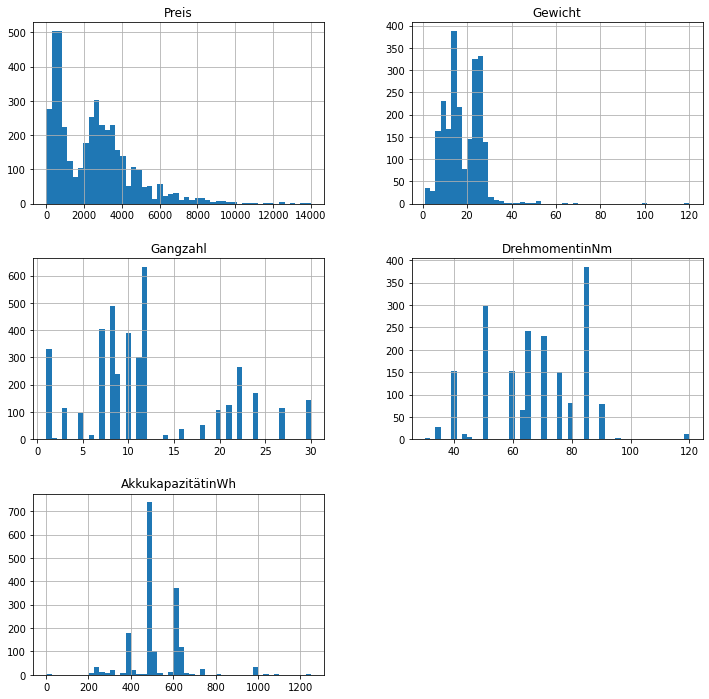

In [4]:
# Basic information about the data set: numerical attributes.
df_num = df[["Preis", "Gewicht", "Gangzahl", 'DrehmomentinNm', 'AkkukapazitätinWh']].copy() 
df_num.hist(bins=50, figsize=(12,12))

<AxesSubplot:ylabel='Rahmenmaterial'>

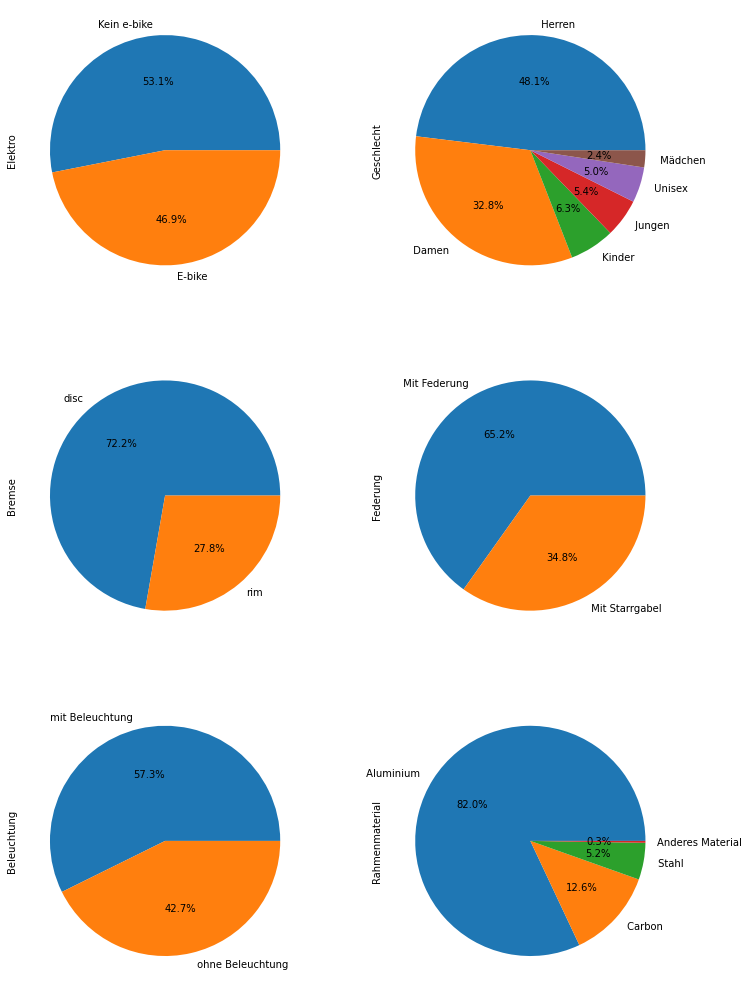

In [5]:
# Basic info about data: other properties.
fig, ax = plt.subplots(3,2,figsize=(12,18))
df.Elektro.value_counts().plot.pie(autopct="%.1f%%", ax=ax[0][0], labels=["Kein e-bike", 'E-bike'])
df.Geschlecht.value_counts().plot.pie(autopct="%.1f%%", ax=ax[0][1])
df.Bremse.value_counts().plot.pie(autopct="%.1f%%", ax=ax[1][0])
df.Federung.value_counts().plot.pie(autopct="%.1f%%", ax=ax[1][1])
df.Beleuchtung.value_counts().plot.pie(autopct="%.1f%%", ax=ax[2][0])
A = df['Rahmenmaterial'].value_counts()
B = A[A>=10]
B["Anderes Material"] = A[A < 10].sum()
B.plot.pie(autopct="%.1f%%", ax=ax[2][1])

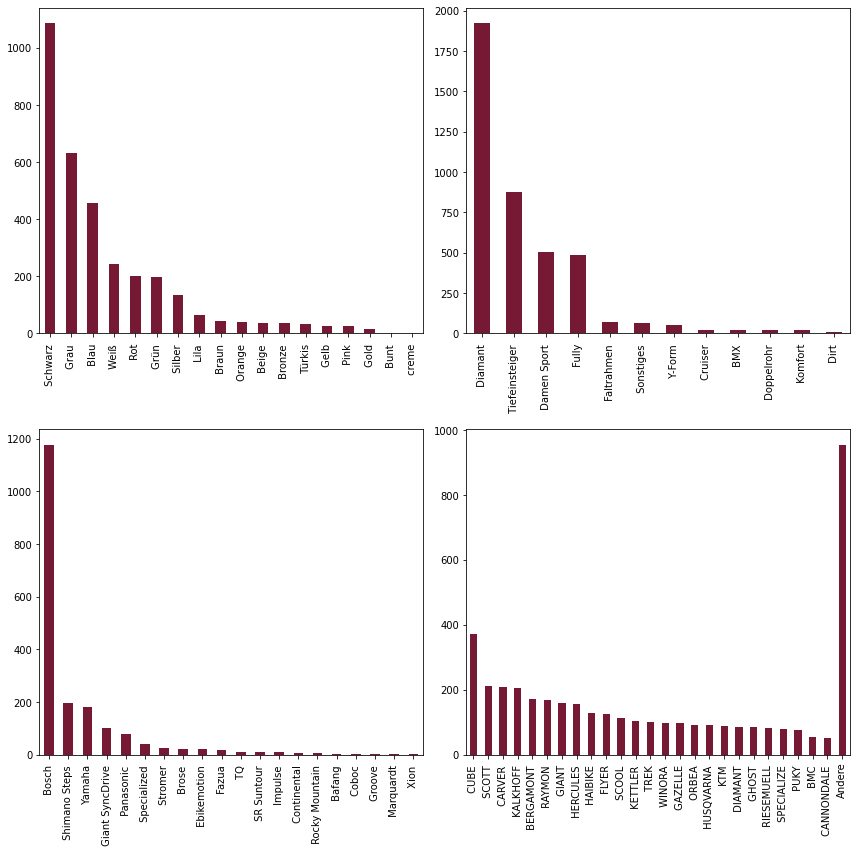

In [6]:
# # 'Marke''Rahmenform''Farbe''E-BikeMotorHersteller'\
fig, ax = plt.subplots(2,2,figsize=(12,12))
df.Farbe.value_counts().plot.bar(alpha=0.9, colormap='RdBu', ax=ax[0][0])
df.Rahmenform.value_counts().plot.bar(colormap='RdBu', alpha=0.9, ax=ax[0][1])
df["E-BikeMotorHersteller"].value_counts().plot.bar(alpha=0.9, colormap='RdBu', ax=ax[1][0])
A = df['Marke'].value_counts()
B = A[A>=50]
B["Andere"] = A[A < 50].sum()
B.plot.bar(alpha=0.9, colormap='RdBu', ax=ax[1][1])
fig.tight_layout()

### Correlations
We try to find correlations of the numerical values.

In [7]:
df_num.corr()

,Preis,Gewicht,Gangzahl,DrehmomentinNm,AkkukapazitätinWh
Preis,1.000000,0.521103,-0.043142,0.329060,0.377664
Gewicht,0.521103,1.000000,-0.189425,0.124559,0.308882
Gangzahl,-0.043142,-0.189425,1.000000,0.177520,0.008880
DrehmomentinNm,0.329060,0.124559,0.177520,1.000000,0.415246
AkkukapazitätinWh,0.377664,0.308882,0.008880,0.415246,1.000000


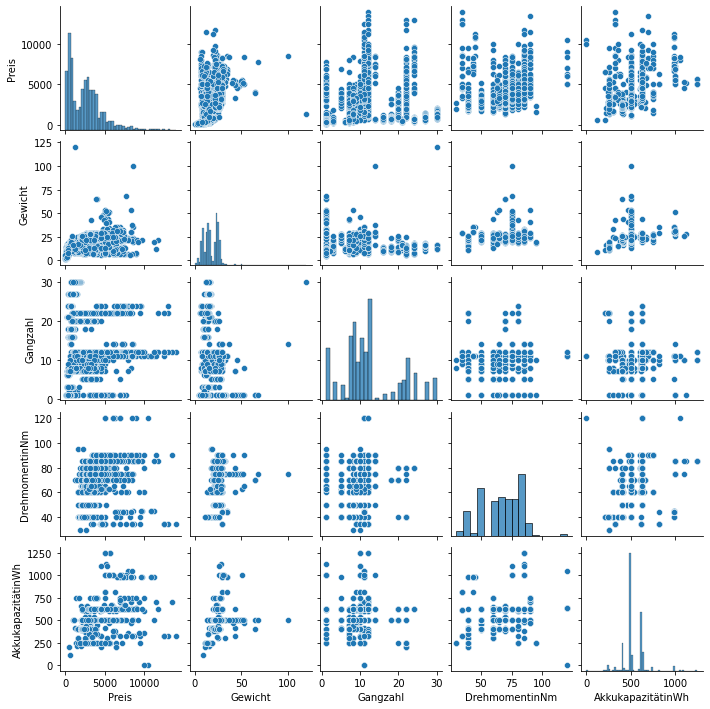

In [8]:
sns.pairplot(df_num, kind="scatter", height=2.0, palette="Paired")

<AxesSubplot:xlabel='Gewicht', ylabel='Preis'>

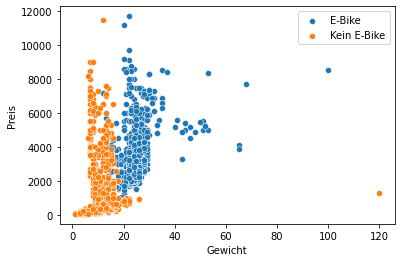

In [9]:
sns.scatterplot(data=df_num[df['Elektro'] == True], x="Gewicht", y="Preis", label = "E-Bike")
sns.scatterplot(data=df_num[df['Elektro'] == False], x="Gewicht", y="Preis", label="Kein E-Bike")

<AxesSubplot:xlabel='Gangzahl', ylabel='Preis'>

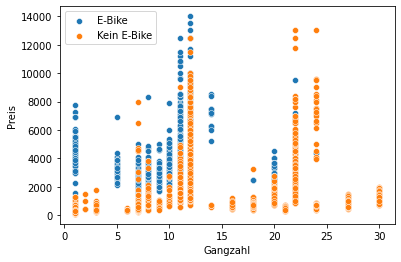

In [10]:
sns.scatterplot(data=df_num[df['Elektro'] == True], x="Gangzahl", y="Preis", label = "E-Bike")
sns.scatterplot(data=df_num[df['Elektro'] == False], x="Gangzahl", y="Preis", label="Kein E-Bike")

<AxesSubplot:xlabel='Gewicht', ylabel='Preis'>

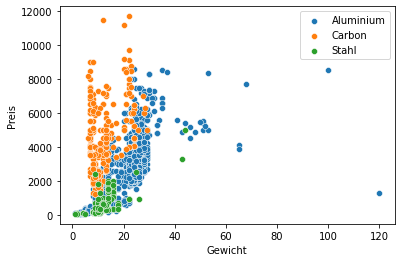

In [11]:
sns.scatterplot(data=df_num[df['Rahmenmaterial'] == " Aluminium "], x="Gewicht", y="Preis", 
                label = "Aluminium")
sns.scatterplot(data=df_num[df['Rahmenmaterial'] == " Carbon "], x="Gewicht", y="Preis", label = "Carbon")
sns.scatterplot(data=df_num[df['Rahmenmaterial'] == " Stahl "], x="Gewicht", y="Preis", label = "Stahl")

<AxesSubplot:xlabel='Gewicht', ylabel='Preis'>

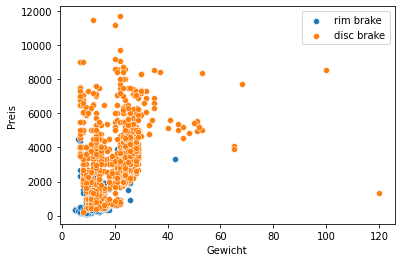

In [12]:
sns.scatterplot(data=df_num[df['Bremse'] == 'rim'], x="Gewicht", y="Preis", label = "rim brake")
sns.scatterplot(data=df_num[df['Bremse'] == 'disc'], x="Gewicht", y="Preis", label="disc brake")

<AxesSubplot:xlabel='AkkProGew', ylabel='Preis'>

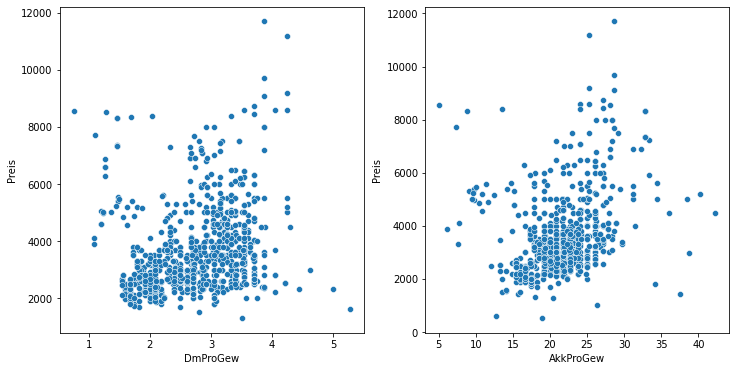

In [13]:
# We try the following combination of features: DrehmomentinNm/Gewicht and Akkukapazität/Gewicht
df_num["DmProGew"] = df_num.DrehmomentinNm / df_num.Gewicht
df_num["AkkProGew"] =  df_num["AkkukapazitätinWh"] / df_num.Gewicht
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_num, x="DmProGew", y="Preis", ax=ax[0])
sns.scatterplot(data=df_num, x="AkkProGew", y="Preis", ax=ax[1])

## 2. Preprocessing <a id="pre"></a>
In the following we prepare the data for the machine learning algorithms. In particular, we apply the following transformations:

<ul>
<li> Remove outliers = errors, unconventional bicycles (children, transporters etc.)</li>
<li> Drop unnecessary features = Gewicht (only half of the sample contains this info), Modell, Farbe, Rahmenform, Geschlecht </li>
<li> Drop bicycles with missing (rest of) data. </li>
<li> We separate e-bikes from non-e-bikes.</li>
<li> Transform textual features to numbers using simple encoders.</li>
<li> Scale numerical features.</li>
</ul>

In the following we will focus only on estimation of e-bike prices. 

In [14]:
# We consider only e-bikes.
df_e = df[df.Elektro].copy()
df_e.describe()

,Preis,Gewicht,Gangzahl,DrehmomentinNm,AkkukapazitätinWh
count,1954.000000,1043.000000,1942.000000,1900.000000,1732.000000
mean,3704.685261,24.986290,9.578270,66.980526,531.179619
std,1598.018886,5.454426,3.566372,15.754239,126.181256
min,529.000000,9.000000,1.000000,30.000000,1.050000
25%,2651.500000,23.000000,8.000000,50.000000,500.000000
50%,3299.000000,24.400000,10.000000,65.000000,500.000000
75%,4199.000000,26.000000,11.000000,85.000000,625.000000
max,13999.000000,100.000000,24.000000,120.000000,1250.000000


<AxesSubplot:title={'center':'Gewicht'}, xlabel='Unnamed: 0'>

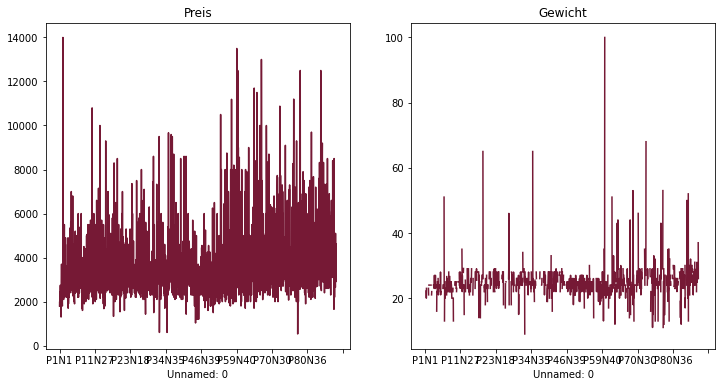

In [15]:
# We inspect outliers based on the following criteria:
# Too large or small weight, price.
# Geschlecht suggests children bicycle.
# Missing information about gears or brakes.
fig, ax = plt.subplots(1,2,figsize=(12,6))
df_e.Preis.plot(alpha=0.9, colormap='RdBu', ax=ax[0], title="Preis")
df_e.Gewicht.plot(alpha=0.9, colormap='RdBu', ax=ax[1], title="Gewicht")

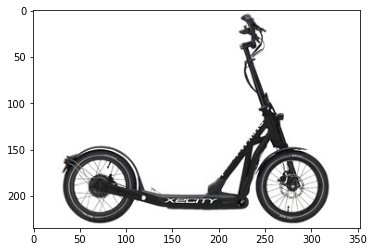

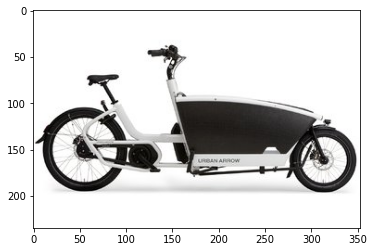

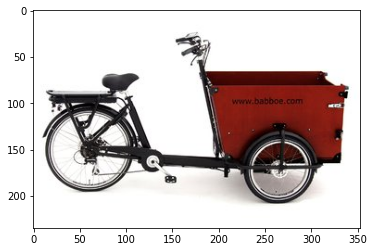

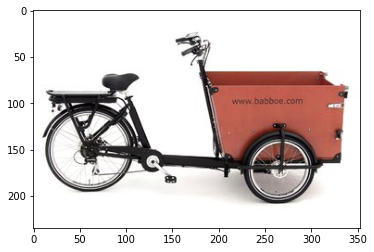

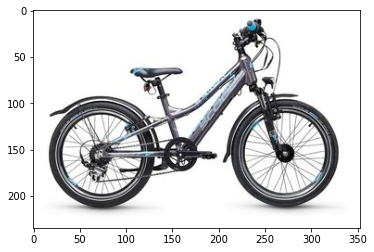

In [16]:
# We inspect the images of bicycles with extreme features.
# Playing briefly with the parameters we find that heavy  bicycles are transporters,
# cheap ones or with missing info about gears are mostly scooters or childrens bicycles.
D = df_e[(~df_e.Gangzahl.notnull()) | (df_e.Gewicht > 35) | (df_e.Preis < 1498) | (df_e.Rahmenmaterial == " Stahl ")] 
for i in D.index[:5]: #consider entire index for more outliers
    img=mpimg.imread('bike_data/'+i+'.jpg')
    plt.imshow(img)
    plt.show() 

In [17]:
# Dropping the outliers. We drop also combined aluminum and carbon bicycles since there are only 4 of them.
df_ec = df[((df.Gewicht <= 35) | (~df.Gewicht.notnull())) & (df.Rahmenmaterial != " Stahl ") & (df.Rahmenmaterial != " Aluminium / Carbon ") & (df.Preis > 1498) & (df.Gangzahl.notnull()) & (df.Elektro)].copy()
df_ec.describe()

,Preis,Gewicht,Gangzahl,DrehmomentinNm,AkkukapazitätinWh
count,1904.000000,1009.000000,1904.000000,1867.000000,1684.000000
mean,3696.560924,24.493261,9.669643,66.888056,532.902672
std,1577.919295,3.159201,3.486722,15.820158,124.957180
min,1499.000000,11.000000,1.000000,30.000000,1.050000
25%,2699.000000,23.000000,8.000000,50.000000,500.000000
50%,3299.000000,24.000000,10.000000,65.000000,500.000000
75%,4111.500000,26.000000,11.000000,85.000000,625.000000
max,13999.000000,35.000000,24.000000,120.000000,1250.000000


In [18]:
# Dropping unnecessary columns.
class DropUnnecessary(BaseEstimator, TransformerMixin):
    def fit(self, DF):
        return self
    def transform(self, DF):
        DF_new = DF.copy()
        DF_new.drop(columns=["Gewicht", "Modell", "Farbe", "Rahmenform", "Geschlecht", "Elektro"], errors='ignore',
                    inplace=True)
        return DF_new
dropunn = DropUnnecessary()
A = dropunn.fit_transform(df_ec)
A.describe() #check

,Preis,Gangzahl,DrehmomentinNm,AkkukapazitätinWh
count,1904.000000,1904.000000,1867.000000,1684.000000
mean,3696.560924,9.669643,66.888056,532.902672
std,1577.919295,3.486722,15.820158,124.957180
min,1499.000000,1.000000,30.000000,1.050000
25%,2699.000000,8.000000,50.000000,500.000000
50%,3299.000000,10.000000,65.000000,500.000000
75%,4111.500000,11.000000,85.000000,625.000000
max,13999.000000,24.000000,120.000000,1250.000000


In [19]:
# We simply drop data with missing information.
class DropMissing(BaseEstimator, TransformerMixin):
    def fit(self, DF):
        return self
    def transform(self, DF):
        DF_new = DF.copy()
        DF_new.dropna(axis=0, how='any', inplace=True)
        return DF_new
dropmissing = DropMissing()
B = dropmissing.fit_transform(A)
B.describe() #check

,Preis,Gangzahl,DrehmomentinNm,AkkukapazitätinWh
count,1597.000000,1597.000000,1597.000000,1597.000000
mean,3606.252974,9.768316,66.398247,537.591766
std,1584.806752,3.134243,15.811085,118.606788
min,1499.000000,1.000000,30.000000,1.050000
25%,2599.000000,8.000000,50.000000,500.000000
50%,3199.000000,10.000000,65.000000,500.000000
75%,3999.000000,11.000000,80.000000,625.000000
max,13999.000000,24.000000,120.000000,1250.000000


In [20]:
# Selection of relevant data in compact form via Pipeline.
df_ec = df[((df.Gewicht <= 35) | (~df.Gewicht.notnull())) & (df.Rahmenmaterial != " Stahl ") & (df.Rahmenmaterial != " Aluminium / Carbon ") & (df.Preis > 1498) & (df.Gangzahl.notnull()) & (df.Elektro)].copy()
pipe_1 = Pipeline([("dropunn", DropUnnecessary()), ("dropmissing", DropMissing())])
DF = pipe_1.fit_transform(df_ec)

In [21]:
# Separate train and test sets on the clean data.
DF_train, DF_test, y_train, y_test = train_test_split(DF.drop(columns=["Preis"]), DF.Preis, 
                                                      test_size=0.2, random_state=0) 
print(len(DF_train)/len(DF), len(y_train)/len(DF), len(DF_test)/len(DF), len(y_test)/len(DF)) #check.

0.799624295554164 0.799624295554164 0.20037570444583594 0.20037570444583594


In [22]:
# We apply transformations to the following categories of columns:
num_attribs = ['Gangzahl', 'DrehmomentinNm', 'AkkukapazitätinWh'] #numerical attributes (scaling)
cat_attribs_binary = ['Bremse', 'Rahmenmaterial', 'Federung', 'Beleuchtung'] #binary categorical atributes (encoder)
cat_attribs_multi_1 = ['Marke'] # multivalued categorical attributes (one hot encoder)
cat_attribs_multi_2 = ['E-BikeMotorHersteller']
onehot = OneHotEncoder() #making sure we do not have problems if the train or test set does not contain some brands
onehot.fit(DF[["Marke"]])
categories_1 = onehot.categories_
onehot.fit(DF[["E-BikeMotorHersteller"]])
categories_2 = onehot.categories_

pipe_2 = ColumnTransformer([('num', StandardScaler(), num_attribs),
                            ('cat_bi',  OrdinalEncoder(), cat_attribs_binary),
                           ('cat_mu_1', OneHotEncoder(categories=categories_1), cat_attribs_multi_1),
                           ('cat_mu_2', OneHotEncoder(categories=categories_2), cat_attribs_multi_2)])
X_train = pipe_2.fit_transform(DF_train)

## 3. Regression <a id="reg"></a>
We first consider a simple linear regression model and a Huber regression model.

In [23]:
# Linear regression.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lin_reg_train = lin_reg.predict(X_train)

In [24]:
#Root mean squared error on the training set.
np.sqrt(mean_squared_error(y_lin_reg_train, y_train))

769.8541494940841

In [25]:
# Mean absolute error.
mean_absolute_error(y_lin_reg_train, y_train)

513.2083949608848

In [26]:
#Cross validation mean score.
np.sqrt(-cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

834.0563293662757

In [27]:
# Huber regression.
from sklearn.linear_model import HuberRegressor

huber_reg = HuberRegressor(max_iter=1000)
huber_reg.fit(X_train, y_train)
y_huber_reg_train = huber_reg.predict(X_train)

In [28]:
np.sqrt(mean_squared_error(y_huber_reg_train, y_train))

801.4330089065833

In [29]:
mean_absolute_error(y_huber_reg_train, y_train)

490.9697888806831

In [30]:
np.sqrt(-cross_val_score(huber_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

845.0055300369253

## 4. Decision trees <a id="dec"></a>

In [31]:
# Decision tree.
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_tree_reg_train = tree_reg.predict(X_train)

In [32]:
np.sqrt(mean_squared_error(y_tree_reg_train, y_train))

417.03857220398777

In [33]:
mean_absolute_error(y_tree_reg_train, y_train)

181.61558509358036

In [34]:
np.sqrt(-cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

799.3090348479765

## 5. Random forests <a id="ran"></a>

In [35]:
# Ensemble learning.
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_forest_reg_train = forest_reg.predict(X_train)

In [36]:
np.sqrt(mean_squared_error(y_forest_reg_train, y_train))

447.5688116204562

In [37]:
mean_absolute_error(y_forest_reg_train, y_train)

238.6857153323929

In [38]:
np.sqrt(-cross_val_score(forest_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()

730.472111567819

## 6. Model selection and evaluation <a id="neu"></a>
The best cross-validation score is obtained by the random forest model. For this reason we select this model and fine tune its parameters. 

In [39]:
#Parameter tuning.
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[10, 25, 50, 100, 150, 200], 'max_features':[4, 6, 8, 10, 12, 14]}]
#              {'bootstrap':[False], 'n_estimators':[3, 10, 30, 50, 100, 200], 'max_features':[2, 3, 4, 5]}
             
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10, 12, 14],
                          'n_estimators': [10, 25, 50, 100, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 25}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=25)

In [42]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res['params']):
    print(np.sqrt(-mean_score), params)

733.7000156125322 {'max_features': 4, 'n_estimators': 10}
709.3132231360058 {'max_features': 4, 'n_estimators': 25}
704.0611145540114 {'max_features': 4, 'n_estimators': 50}
700.2135217705145 {'max_features': 4, 'n_estimators': 100}
697.636908547389 {'max_features': 4, 'n_estimators': 150}
697.07903241125 {'max_features': 4, 'n_estimators': 200}
740.6786051899824 {'max_features': 6, 'n_estimators': 10}
703.188906875992 {'max_features': 6, 'n_estimators': 25}
703.6137857705633 {'max_features': 6, 'n_estimators': 50}
698.3462954861342 {'max_features': 6, 'n_estimators': 100}
690.2409546261075 {'max_features': 6, 'n_estimators': 150}
703.3799875405257 {'max_features': 6, 'n_estimators': 200}
709.0782948354563 {'max_features': 8, 'n_estimators': 10}
713.8747867792397 {'max_features': 8, 'n_estimators': 25}
708.5105603383339 {'max_features': 8, 'n_estimators': 50}
702.5193594980148 {'max_features': 8, 'n_estimators': 100}
695.8666244300962 {'max_features': 8, 'n_estimators': 150}
699.271983

In [43]:
#Loading the test data.
pipe_2 = ColumnTransformer([('num', StandardScaler(), num_attribs),
                            ('cat_bi',  OrdinalEncoder(), cat_attribs_binary),
                           ('cat_mu_1', OneHotEncoder(categories=categories_1), cat_attribs_multi_1),
                           ('cat_mu_2', OneHotEncoder(categories=categories_2), cat_attribs_multi_2)])
X_test = pipe_2.fit_transform(DF_test)

In [44]:
print(len(y_test), y_test.mean())

320 3774.89375


In [49]:
# Evaluation of results on the test set.
final_model = RandomForestRegressor(max_features=12, n_estimators=25)
final_model.fit(X_train, y_train)
y_final_model_test = final_model.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_final_model_test, y_test))

775.6724988068668

In [51]:
mean_absolute_error(y_final_model_test, y_test)

435.92399391338694

## 7. Results and conclusion <a id="res"></a>

<ul>
<li> Using a random forest model with tuned parameters we obtain that the root mean squared error on the test set is 775 Euro and the mean absolute error is 435 Euro.</li>
<li>The test set contains 320 bicycles and the mean price is 3775 Euro. This means that our estimate is on average around 20% procent off the real price based on the root squared error and around 12% using the absolute error.  </li>
<li>The selected model performs better than linear regression,  Huber regression and a decision tree regression model. </li>
<li> The considered model can be used as a rough price estimator. On the other hand, more precise estimates may be obtained involving more precise details about the bicycle components, e.g., type of braking mechanism (hydraulic vs mechanical) or transmission features such as type or brand.</li>
<li>Other models may be considered for improved results, e.g., support vector machines or neural networks.</li>
</ul>
Finally, we present some examples from the test set: 

Price: 5999.0, estimated price: 6160.789895659896.


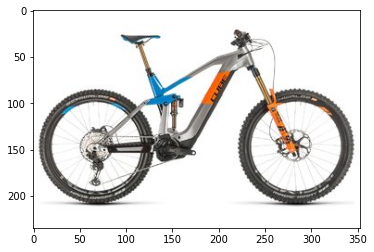

Price: 2799.0, estimated price: 2847.36.


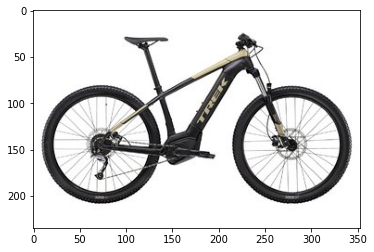

Price: 4249.0, estimated price: 3396.612259670155.


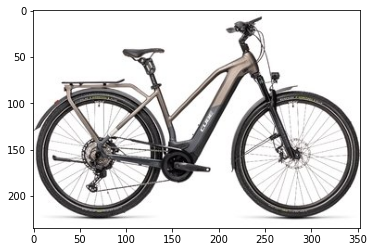

Price: 2599.0, estimated price: 2446.67619047619.


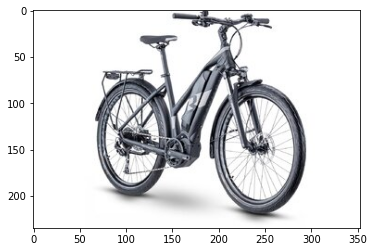

Price: 8749.0, estimated price: 6160.789895659896.


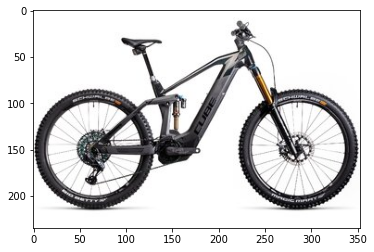

Price: 2499.0, estimated price: 2421.3333333333335.


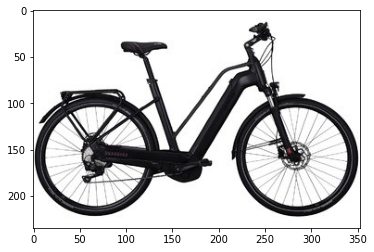

Price: 2499.0, estimated price: 2609.7450216450216.


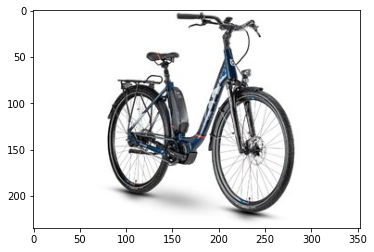

Price: 4699.0, estimated price: 3163.4.


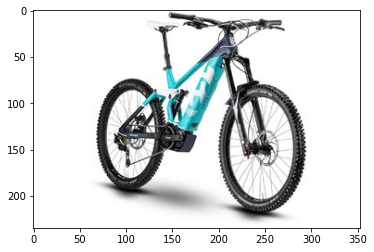

Price: 5199.0, estimated price: 5510.561904761906.


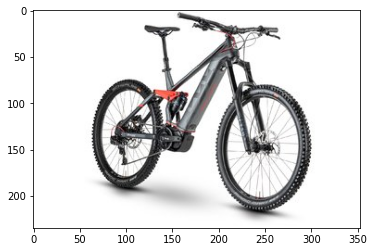

Price: 3499.0, estimated price: 3812.080952380953.


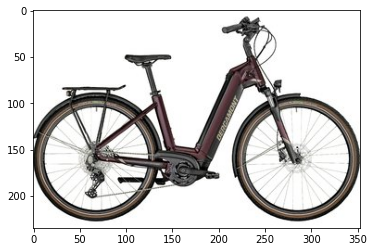

In [52]:
df_ex = y_test[:10]

for i in range(0,10):
    ind = df_ex.index[i]
    img=mpimg.imread('bike_data/'+ind+'.jpg')
    print(f"Price: {y_test[ind]}, estimated price: {y_final_model_test[i]}.")
    plt.imshow(img)
    plt.show() 